# TRAFFIC SIGNS CLASSIFICATION USING CNN

### Traffic signs, indeed provide us a multitude of information and guide us accordingly so that we can move safely. Traffic sign classification is very useful in automatic driver systems.

### In this project I am using a CNN model for Traffic sign classification. A convolutional neural network is a class of deep learning networks, used to examine and check visual imagery. It is used to train the image classification and recognition model because of its high accuracy and precision.

In [45]:
##importing necessary libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image

In [3]:
import os

In [4]:
os.chdir('C:/TRAFFIC SIGNS RECOGNITION')

In [5]:
from tensorflow.keras.utils import to_categorical

In [6]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [7]:
## Store data,labels in the list

In [8]:
data=[]
labels=[]
#we have 43 classes
classes=43
cur_path=os.getcwd()

In [9]:
cur_path

'C:\\TRAFFIC SIGNS RECOGNITION'

In [10]:
##preprocess the images

In [11]:
for i in range(classes):
    path=os.path.join(cur_path,'train',str(i))
    images=os.listdir(path)
    for a in images:
        try:
            image=Image.open(path +'\\'+a)
            image=image.resize((30,30))
            image=np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [12]:
##converting list into numpy array

In [13]:
data=np.array(data)
labels=np.array(labels)

In [14]:
##save labels and data for future use

In [15]:
##i have created traing folder to save data

In [16]:
#os.mkdir

In [17]:
np.save('./Training/data',data)
np.save('./Training/target',labels)

In [18]:
##load data and labels

In [19]:
data=np.load('./Training/data.npy')
labels=np.load('./Training/target.npy')

In [20]:
print(data.shape,labels.shape)

(39209, 30, 30, 3) (39209,)


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=0)

In [23]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [24]:
#Convert labels to onehot encoding

In [25]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [26]:
#now its time to build model

In [27]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [28]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
#fitting the model
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 155s 156ms/step - loss: 2.2420 - accuracy: 0.4333 - val_loss: 0.9126 - val_accuracy: 0.7558
Epoch 2/20
981/981 [==============================] - 151s 154ms/step - loss: 0.9424 - accuracy: 0.7166 - val_loss: 0.3865 - val_accuracy: 0.8916
Epoch 3/20
981/981 [==============================] - 150s 153ms/step - loss: 0.5590 - accuracy: 0.8304 - val_loss: 0.3013 - val_accuracy: 0.9090
Epoch 4/20
981/981 [==============================] - 150s 153ms/step - loss: 0.4156 - accuracy: 0.8748 - val_loss: 0.1801 - val_accuracy: 0.9487
Epoch 5/20
981/981 [==============================] - 368s 375ms/step - loss: 0.3573 - accuracy: 0.8948 - val_loss: 0.1334 - val_accuracy: 0.9617
Epoch 6/20
981/981 [==============================] - 149s 152ms/step - loss: 0.3142 - accuracy: 0.9085 - val_loss: 0.1083 - val_accuracy: 0.9714
Epoch 7/20
981/981 [==============================] - 148s 151ms/step - loss: 0.2857 - accuracy: 0.9159 - val_loss: 0.0926 -

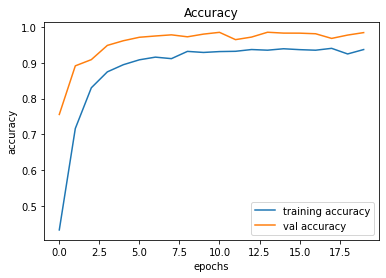

In [30]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

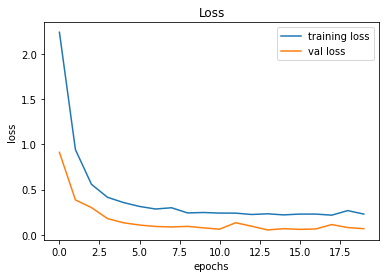

In [31]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [32]:
##LETS DO TESTING ON TEST DATA

In [33]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [34]:
X_test, label = testing('Test.csv')

In [35]:
Y_pred = np.argmax(model.predict(X_test),axis=1)
Y_pred

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [36]:
##ACCURACY WITH THE TEST DATA

In [37]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9540775930324624


In [38]:
##SAVE THE MODEL

In [39]:
model.save("./training/TSR.h5")

In [40]:
##LOAD THE MODEL

In [41]:
import os
os.chdir(r'C:/TRAFFIC SIGNS RECOGNITION')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [42]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [43]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = np.argmax(model.predict(X_test),axis=1)
    return image,Y_pred

Predicted traffic sign is:  Bumpy road


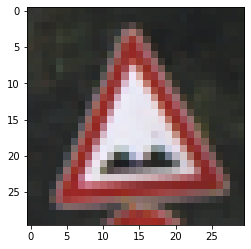

In [44]:
plot,prediction = test_on_img(r'C:/TRAFFIC SIGNS RECOGNITION\Test\00500.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()